# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read csv
url = "https://github.com/majorhenry/ML_Course_9-11-20/raw/main/Project/churn.csv"
data = pd.read_csv(url)
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [7]:
data.shape

(3333, 11)

In [8]:
# Describe our data for each feature and use .info() for get information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


data.shape


In [9]:
# Analys missing values
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [10]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [11]:
data.groupby(by="Churn").count() #so our label is a continouos variable, which also denote a binary classification problem

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850
1,483,483,483,483,483,483,483,483,483,483


# Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


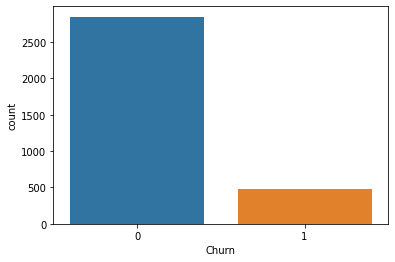

In [12]:
# Our label Distribution (countplot)
sns.countplot(data['Churn'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


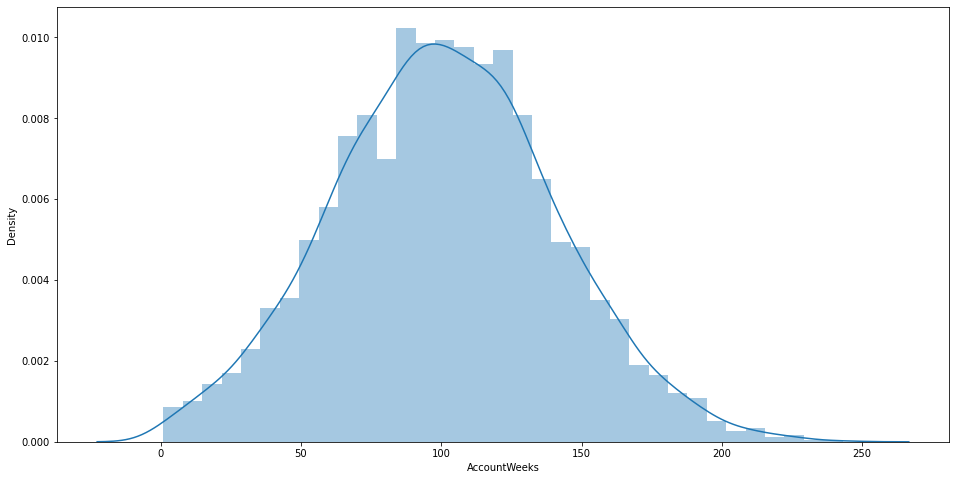

In [13]:
# Example EDA
plt.figure(figsize=(16, 8))
sns.distplot(data["AccountWeeks"])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [14]:
#checking for any duplicated values
from pandas import read_csv
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


In [15]:
#check for outliers
from scipy import stats
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [16]:
len(np.where(z > 3)[0])

426

In [17]:
outliers = list(set(np.where(z > 3)[0]))
new_data = data.drop(outliers,axis = 0).reset_index(drop = True)
display(new_data)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...
2914,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [18]:
#split and train dataset
x = new_data.drop("Churn", axis=1)
y = new_data["Churn"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7, stratify=y)
#Note: stratify was used as a result of the label imbalance in order the balance the distribution that way in train and test split

In [20]:
#scaling using MinMaxScaler or StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

1. RandomForest Classifier

In [21]:
from sklearn.ensemble import  RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy of train:",rfc_model.score(X_train_scaled, y_train))
print("Accuracy of test:",rfc_model.score(X_test_scaled, y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9452054794520548


In [23]:
rfc_prediction = rfc_model.predict(X_test_scaled)

Bias for training = 1-1 = 0
Bias for test = 1-0.95 = 0.05

Variance = test bias - training bias = 0.05

The Bias and Variance calculation shows it is negligible due to its relatively small value and the model is okay

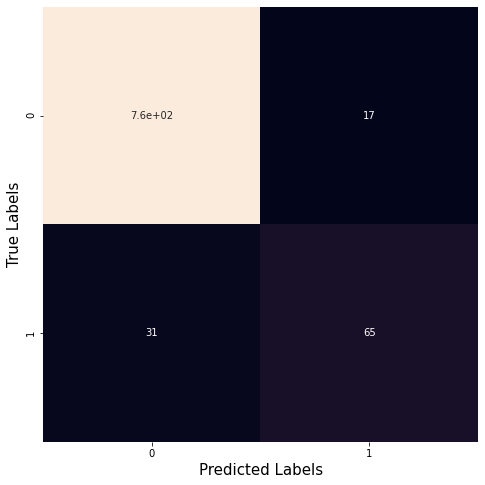

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rfc_prediction)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [25]:
#Considering other metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_prediction))

print("Precision = {}".format(precision_score(y_test, rfc_prediction)))
print("Recall = {}".format(recall_score(y_test, rfc_prediction)))
print("Accuracy = {}".format(accuracy_score(y_test, rfc_prediction)))
print("F1 Score = {}".format(f1_score(y_test, rfc_prediction)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       780
           1       0.79      0.68      0.73        96

    accuracy                           0.95       876
   macro avg       0.88      0.83      0.85       876
weighted avg       0.94      0.95      0.94       876

Precision = 0.7926829268292683
Recall = 0.6770833333333334
Accuracy = 0.9452054794520548
F1 Score = 0.7303370786516854



2. DecisionTree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(max_depth=4, random_state=4)
dtc_model.fit(X_train_scaled,y_train)
print("Accuracy of train:",dtc_model.score(X_train_scaled, y_train))
print("Accuracy of test:",dtc_model.score(X_test_scaled,y_test))

Accuracy of train: 0.9549681840430739
Accuracy of test: 0.9372146118721462


In [28]:
dtc_prediction = dtc_model.predict(X_test_scaled)

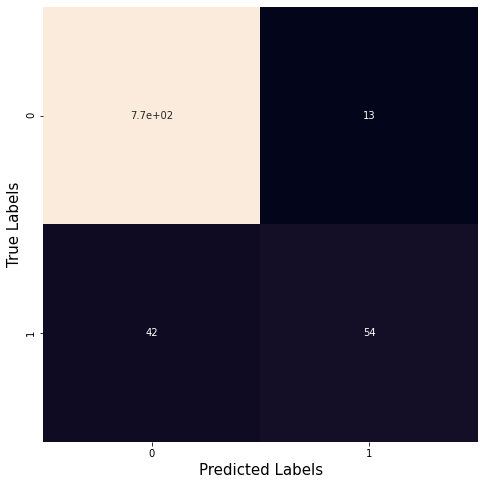

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dtc_prediction)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [30]:
print(classification_report(y_test, dtc_prediction))

print("Precision = {}".format(precision_score(y_test, dtc_prediction)))
print("Recall = {}".format(recall_score(y_test, dtc_prediction)))
print("Accuracy = {}".format(accuracy_score(y_test, dtc_prediction)))
print("F1 Score = {}".format(f1_score(y_test, dtc_prediction)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       780
           1       0.81      0.56      0.66        96

    accuracy                           0.94       876
   macro avg       0.88      0.77      0.81       876
weighted avg       0.93      0.94      0.93       876

Precision = 0.8059701492537313
Recall = 0.5625
Accuracy = 0.9372146118721462
F1 Score = 0.6625766871165644


3. XGBoost Classifier

In [31]:
pip install xgboost

In [32]:
from xgboost.sklearn import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled,y_train)
print("Accuracy of train:",xgb_model.score(X_train_scaled, y_train))
print("Accuracy of test:",xgb_model.score(X_test_scaled,y_test))


Accuracy of train: 0.9686735193343123
Accuracy of test: 0.9394977168949772


In [33]:
#Let us try hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1,1],
    'n_estimators': [200,500,1000],
    'num_class': [3]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=2,n_jobs = -1).fit(X_train_scaled,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train_scaled,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test_scaled,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'num_class': 3}
Mean of the cv scores is 0.955946
Train Score 0.973568
Test Score 0.946347
Seconds used for refitting the best model on the train dataset: 1.320629


In [34]:
xgb_prediction = xgb_model.predict(X_test_scaled)

In [35]:

clf_prediction = clf.predict(X_test_scaled)

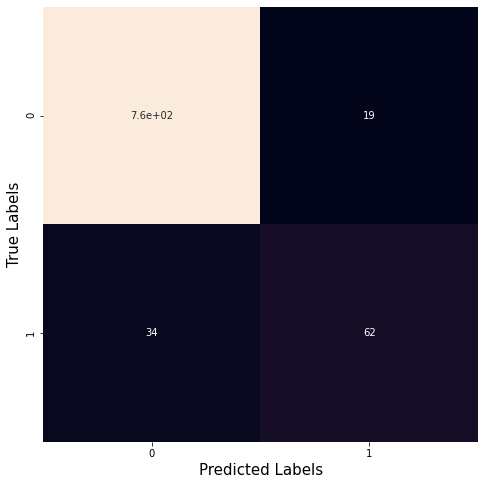

In [36]:
# Confusion Matrix without hyperparameter
cm = confusion_matrix(y_test, xgb_prediction)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

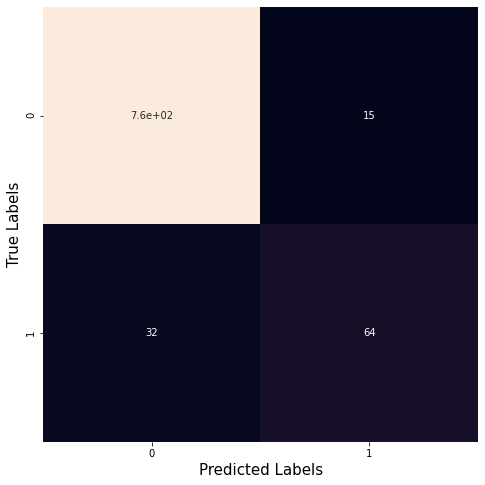

In [37]:
#confusion matrix with hyperparameter
cm = confusion_matrix(y_test, clf_prediction)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()


So we can say our models did well with or without hyperparameter tuning, though both bias and variance of both xgbmodel are neglible but the hyperparameter helped to reduce it further.

In [38]:
#Without hyperparameter
print(classification_report(y_test, xgb_prediction))

print("Precision = {}".format(precision_score(y_test, xgb_prediction)))
print("Recall = {}".format(recall_score(y_test, xgb_prediction)))
print("Accuracy = {}".format(accuracy_score(y_test, xgb_prediction)))
print("F1 Score = {}".format(f1_score(y_test, xgb_prediction)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       780
           1       0.77      0.65      0.70        96

    accuracy                           0.94       876
   macro avg       0.86      0.81      0.83       876
weighted avg       0.94      0.94      0.94       876

Precision = 0.7654320987654321
Recall = 0.6458333333333334
Accuracy = 0.9394977168949772
F1 Score = 0.7005649717514124


In [40]:
#with hyperparameter
print(classification_report(y_test, clf_prediction))

print("Precision = {}".format(precision_score(y_test, clf_prediction)))
print("Recall = {}".format(recall_score(y_test, clf_prediction)))
print("Accuracy = {}".format(accuracy_score(y_test, clf_prediction)))
print("F1 Score = {}".format(f1_score(y_test, clf_prediction)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       780
           1       0.81      0.67      0.73        96

    accuracy                           0.95       876
   macro avg       0.88      0.82      0.85       876
weighted avg       0.94      0.95      0.94       876

Precision = 0.810126582278481
Recall = 0.6666666666666666
Accuracy = 0.9463470319634704
F1 Score = 0.7314285714285714


4. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


lg_model = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(lg_model,X_train_scaled,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test_scaled,y_test)))

Mean training accuracy: 0.8996573666177191
Test accuracy: 0.8961187214611872


In [42]:
lg_model2 = LogisticRegression()
lg_model2.fit(X_train_scaled,y_train)
print("Accuracy of train:",xgb_model.score(X_train_scaled, y_train))
print("Accuracy of test:",xgb_model.score(X_test_scaled,y_test))

Accuracy of train: 0.9686735193343123
Accuracy of test: 0.9394977168949772


In [43]:
lg_prediction1 = cv["estimator"][0].predict(X_test_scaled)
lg_prediction2 = lg_model2.predict(X_test_scaled)

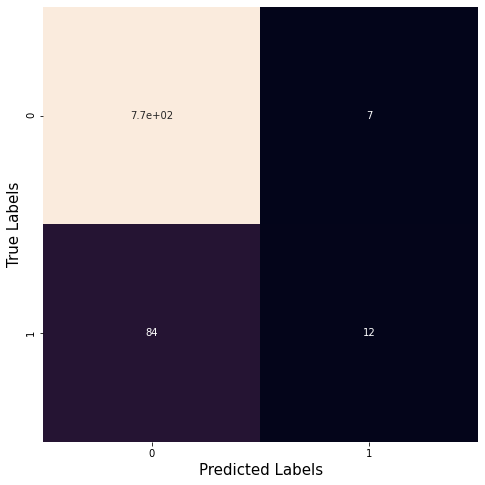

In [44]:
# Confusion Matrix with cv
cm = confusion_matrix(y_test, lg_prediction1)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

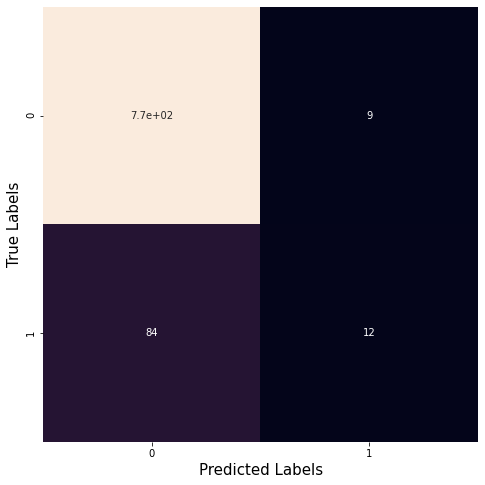

In [45]:
# Confusion Matrix with cv
cm = confusion_matrix(y_test, lg_prediction2)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [46]:
#with cv
print(classification_report(y_test, lg_prediction1))

print("Precision = {}".format(precision_score(y_test, lg_prediction1)))
print("Recall = {}".format(recall_score(y_test, lg_prediction1)))
print("Accuracy = {}".format(accuracy_score(y_test, lg_prediction1)))
print("F1 Score = {}".format(f1_score(y_test, lg_prediction1)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       780
           1       0.63      0.12      0.21        96

    accuracy                           0.90       876
   macro avg       0.77      0.56      0.58       876
weighted avg       0.87      0.90      0.86       876

Precision = 0.631578947368421
Recall = 0.125
Accuracy = 0.8961187214611872
F1 Score = 0.20869565217391303


In [47]:
#with hyperparameter
print(classification_report(y_test, lg_prediction2))

print("Precision = {}".format(precision_score(y_test, lg_prediction2)))
print("Recall = {}".format(recall_score(y_test, lg_prediction2)))
print("Accuracy = {}".format(accuracy_score(y_test, lg_prediction2)))
print("F1 Score = {}".format(f1_score(y_test, lg_prediction2)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       780
           1       0.57      0.12      0.21        96

    accuracy                           0.89       876
   macro avg       0.74      0.56      0.57       876
weighted avg       0.87      0.89      0.86       876

Precision = 0.5714285714285714
Recall = 0.125
Accuracy = 0.8938356164383562
F1 Score = 0.20512820512820512


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

1.
The best performing model is RandomForest, then XGBoost Classifier with hyper parameter tuning. We can not use accuracy to judge because it only works well if there are equal number of samples belonging to each class .i.e the label class. I will be using F1 score and confusion matrix

Confusion Matrix

Now let us consider confusion matrix of RandomForest, we all know TP was high across all the model but this model has the highest TN as compared to others, the only model closer was XGB Classifier. Even if we are to consider FP & FN, it has lowest. So, we can basically say RandomForest model was the best because it predicted more accurate values and also has the lowest wrongly predicted values as compared to other models.

F1 Score

Let us then consider F1 Score. What does F1 Score tells us? It means the greater the F1 Score the better the perfomance of our model. So without further ado, also again RandomForest model has the highest F1 Score, then also followed by XGB Classifier

2.
The truth is, our models can perform better, and one thing about Machine Learning also is, little ignored aspect can be so significant that your model will not perform well. I will be mentioning 3 ways our models can be improved.

A. Oversampling techniques like SMOTE to handle imbalanced data, modelling the imbalanced data of the target class will also go a long way to improve our model.

C. Considering feature importance. If we remove the features that have very little significance in training our model, it will also help in boosting the performance of our model.

D. Ensenmble methods, using the likes of bagging, boosting and the rest could actually help in training out the best model for our dataset.